In [ ]:
# !pip install tensorflow
# !pip install keras
# !pip install pandas
# !pip install matplotlib
# !pip install scikit_learn
!pip install seaborn

In [1]:
import csv
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn import preprocessing
import seaborn as sns
import tensorflow as tf

np.set_printoptions(precision=3, suppress=True)

from tensorflow import keras
from tensorflow.keras import layers
print('Successfully imported all')
print('Tensorflow version - ', tf.__version__)

Successfully imported all
Tensorflow version -  2.16.0-rc0


In [2]:
##Open Dataset
df = pd.read_csv('CSV Files with Calculated Indicators/NYSE.csv')

In [ ]:
train_dataset = dataset.sample(frac=0.8, random_state=0)
test_dataset = dataset.drop(train_dataset.index)

In [ ]:
train_features = train_dataset.copy()
test_features = test_dataset.copy()

train_labels = train_features.pop('Adj Close')
test_labels = test_features.pop('Adj Close')

In [ ]:
normalizer = tf.keras.layers.Normalization(axis=-1)
normalizer.adapt(np.array(train_features))
print(normalizer.mean.numpy())
first = np.array(train_features[:1])

with np.printoptions(precision=2, suppress=True):
  print('First example:', first)
  print()
  print('Normalized:', normalizer(first).numpy())

In [ ]:
SMAAC_21_arr = np.array(train_features['SMAAC_21'])

SMAAC_21_normalizer = layers.Normalization(input_shape=[1,], axis=None)
SMAAC_21_normalizer.adapt(SMAAC_21_arr)

In [ ]:
linear_model.predict(SMAAC_21_arr[:10])

In [ ]:
############################################################################################################################
# Scrap Code

In [ ]:
train_dataset = concatenated_df.sample(frac=0.8, random_state=0)
test_dataset = concatenated_df.drop(train_dataset.index)
sns.pairplot(train_dataset[['Adj Close', 'Volume', 'SMAAC_7']], diag_kind='kde')

In [ ]:
concatenated_df.tail()

In [ ]:
train_dataset.describe().transpose()

In [6]:
#Normalization method 2
sub_df = df[['Date', 'CT']]
df.drop(['Date', 'CT'], axis=1, inplace=True)
normalized_df=(df-df.mean())/df.std()
normalized_df=(df-df.min())/(df.max()-df.min())
concatenated_df = pd.concat([sub_df,normalized_df], axis=1)

KeyError: "None of [Index(['Date', 'CT'], dtype='object')] are in the [columns]"

,Date,CT,Open,High,Low,Close,Adj Close,Volume,SMAAC_7,SMAAC_12,...,VARAC_14,STDEVAC_14,LBB_20,UBB_20,VI_14,CV_12,OBV,COBV,ACCDIST,CMF
0,37187,0,0.128013,0.120804,0.131645,0.128013,0.128013,0.110185,0.120745,0.111874,...,0.001456,0.024909,0.122759,0.097919,0.113833,0.638400,0.019259,0.536677,0.000000,0.000000
1,37188,0,0.126765,0.119555,0.130394,0.126765,0.126765,0.111844,0.120191,0.112421,...,0.001421,0.024471,0.127726,0.095604,0.113938,0.673156,0.018164,0.536464,0.000000,0.000000
2,37189,0,0.131502,0.124294,0.135139,0.131502,0.131502,0.114319,0.119921,0.113410,...,0.001468,0.025051,0.131511,0.094321,0.119240,0.695730,0.019282,0.530776,0.000000,0.000000
3,37190,0,0.134417,0.127210,0.138060,0.134417,0.134417,0.103796,0.120933,0.113874,...,0.001294,0.022890,0.132787,0.094904,0.113492,0.714398,0.020303,0.530807,0.000000,0.000000
4,37193,1,0.125775,0.118564,0.129402,0.125775,0.125775,0.091650,0.121356,0.113187,...,0.000800,0.016037,0.134954,0.093862,0.135917,0.724280,0.019396,0.536166,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5566,45282,0,0.952097,0.953090,0.956590,0.955566,0.955566,0.261967,0.954931,0.944220,...,0.036116,0.176397,0.906243,0.938807,0.097232,0.786285,0.918017,0.533638,0.997743,0.847595
5567,45286,0,0.955566,0.958562,0.960691,0.962348,0.962348,0.215203,0.956429,0.948939,...,0.036156,0.176502,0.909179,0.943054,0.091559,0.786553,0.926216,0.533620,0.997743,0.839556
5568,45287,0,0.962348,0.959767,0.966360,0.965308,0.965308,0.235786,0.959619,0.953448,...,0.032905,0.167636,0.912983,0.946746,0.089729,0.786544,0.926216,0.533628,0.997743,0.845950
5569,45288,0,0.965308,0.961213,0.969106,0.964717,0.964717,0.231434,0.962204,0.957471,...,0.027608,0.152206,0.917470,0.949430,0.090725,0.784540,0.926216,0.533449,0.997743,0.854684


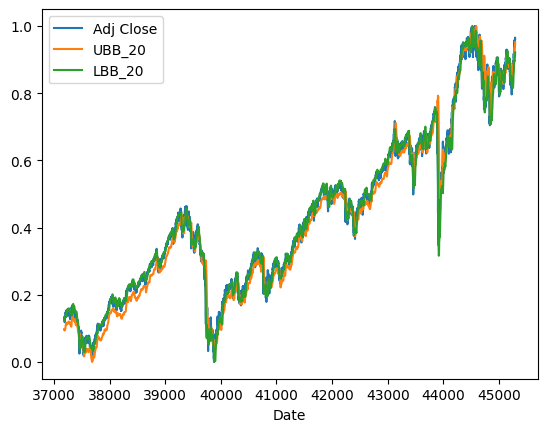

In [7]:
#Linegraph for normalized Dataset
concatenated_df.plot(x='Date', y=['Adj Close','UBB_20','LBB_20'], kind='line')
plt.show()

In [ ]:
#Plot correlations (For unnormalized Dataset)
f = plt.figure(figsize=(19, 15))
corr = df.corr()
plt.matshow(corr, fignum=f.number)
plt.xticks(range(df.select_dtypes(['number']).shape[1]), df.select_dtypes(['number']).columns, fontsize=10, rotation=90)
plt.yticks(range(df.select_dtypes(['number']).shape[1]), df.select_dtypes(['number']).columns, fontsize=10)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.title('Correlation Matrix', fontsize=16);